In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import re
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.neural_network import MLPClassifier 

In [89]:
cf = pd.read_csv('titanic.csv')
test = pd.read_csv('test.csv')
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
mapp= {"Mr.": 0, "Miss.": 1, "Mrs.": 2, "Master.": 3, "Dr.": 3, "Rev.": 3, "Col.": 3, "Major.": 3, "Mlle.": 3,
           "Countess.": 3,"Ms.": 3, "Lady.": 3, "Jonkheer.": 3, "Don.": 3, "Dona." : 3, "Mme.": 3,"Capt.": 3,"Sir.": 3 }
mappe = {"S": 0, "C": 1, "Q": 2}
data = [cf, test]
for df in data:
    df['Cabin'] = df['Cabin'].str[:1].map(cabin_mapping)
    dff=np.vectorize(lambda x: 2 if str(x) =='nan' else x)
    df['Cabin']=dff(df['Cabin'])
    dff=np.vectorize(lambda x: 1 if x =='male' else 0)
    df['Sex']=dff(df['Sex'])
    dff=np.vectorize(lambda x: 30 if str(x) =='nan' else x)
    df['Age']=dff(df['Age'])
    pat= '\w[.]' 
    dff=np.vectorize(lambda x: re.search(pat,x) in np.array(x))
    df['Name']=np.array([x for w in df['Name'] for x in w.split() if (re.findall(pat, x) and len(x)>2)])

    df['Name'] = df['Name'].map(mapp)
    
    df['Embarked'] = df['Embarked'].map(mappe)
    df['Embarked'] = df['Embarked'].fillna(0).astype(int)
#     dff=np.vectorize(lambda x: 1 if x == 0 else 0)
#     df['Mr.'] =dff(df['Name'])
#     dff=np.vectorize(lambda x: 1 if x == 1 else 0)
#     df['Miss.'] =dff(df['Name'])
#     dff=np.vectorize(lambda x: 1 if x == 2 else 0)
#     df['Mrs.'] =dff(df['Name'])
#     dff=np.vectorize(lambda x: 1 if x == 3 else 0)
#     df['other.'] =dff(df['Name'])
#     df = df.drop(['Name'], axis=1)
#     df.loc[ df['Age'] <= 16, 'Age'] = 0,
#     df.loc[(df['Age'] > 16) & (df['Age'] <= 26), 'Age'] = 1,
#     df.loc[(df['Age'] > 26) & (df['Age'] <= 36), 'Age'] = 2,
#     df.loc[(df['Age'] > 36) & (df['Age'] <= 62), 'Age'] = 3,
#     df.loc[ df['Age'] > 62, 'Age'] = 4
for dataset in data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4,
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].fillna(0).astype(int)

features_drop = ['Ticket', 'SibSp', 'Parch']
cf = cf.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

target = cf['Survived']
cf = cf.drop(['Survived'], axis=1)

test_data = test.drop("PassengerId", axis=1).copy()
test_data[:10]
features_drop = ["PassengerId"]
cf = cf.drop(features_drop, axis=1)
test_data[:10]

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,3,0,1,2.0,0,2,2
1,3,2,0,3.0,0,2,0
2,2,0,1,3.0,0,2,2
3,3,0,1,2.0,0,2,0
4,3,2,0,1.0,0,2,0
5,3,0,1,0.0,0,2,0
6,3,1,0,2.0,0,2,2
7,2,0,1,1.0,1,2,0
8,3,2,0,1.0,0,2,1
9,3,0,1,1.0,1,2,0


In [84]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(cf, target,random_state= 0)
# X_train_scaled, X_test_scaled, y_train, y_test,_ = apply_preprocessing(df_train, df_test)

In [85]:
def run_GridSearchCV(clf,grid_values, X_train_scaled, X_test_scaled, y_train, y_test= None):
#     print ('Running GridSearchCV.')
#     grid_clf = GridSearchCV(clf, param_grid=grid_values,scoring='roc_auc')
#     grid_clf.fit(X_train_scaled, y_train)
#     print('Grid best parameter (max.roc_auc ): ', grid_clf.best_params_) 
#     print('Grid best score (roc_auc): ', grid_clf.best_score_) 

#     if not y_test is None:
#         test_score= grid_clf.score(X_test_scaled, y_test)
#         print("test roc_auc= {}".format(test_score))

    print ('Running GridSearchCV.')
    grid_clf = GridSearchCV(clf, param_grid=grid_values,scoring='f1')
    grid_clf.fit(X_train_scaled, y_train)
    print('Grid best parameter (max f1 ): ', grid_clf.best_params_) 
    print('Grid best score (f1): ', grid_clf.best_score_) 

    if not y_test is None:
        test_score= grid_clf.score(X_test_scaled, y_test)
        print("test f1= {}".format(test_score))
def run_all_classifiers(X_train_scaled, X_test_scaled, y_train, y_test=None, list_classifiers= None):
    if list_classifiers is None or 'LogisticRegression' in list_classifiers:
        print ('\nLogisticRegression.')
        clf = LogisticRegression()
        grid_values = {'C': [0.005, 0.01,0.1, 1, 100, 10000, 100000]}
        run_GridSearchCV(clf,grid_values, X_train_scaled,X_test_scaled,  y_train,  y_test= y_test)

    if list_classifiers is None or 'DecisionTreeClassifier' in list_classifiers:
        print ('\nDecisionTreeClassifier')
        clf = DecisionTreeClassifier()       
        grid_values = {'max_depth': [2,5,7, 20, 50]}
        run_GridSearchCV(clf,grid_values, X_train_scaled, X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'RandomForestClassifier' in list_classifiers:
        print ('\nRandomForestClassifier.')
        clf = RandomForestClassifier()       
        grid_values = {'n_estimators': [20,50]} #,200,300]}
        run_GridSearchCV(clf,grid_values, X_train_scaled,X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'SVC_poly' in list_classifiers:
        print ('\nSVC_poly')
        clf = SVC(kernel='poly')           
        grid_values = {'C': [0.01]}# , 0.1, 1, 100, ]}
        run_GridSearchCV(clf,grid_values, X_train_scaled, X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'SVC_rbf' in list_classifiers:
        print ('\nSVC_rbf')
        clf = SVC(kernel='rbf')
        grid_values = {'C': [0.005, 0.01]}# , 0.02, 0.03, 0.1, 1, 100, 10000], 'gamma':[0.001, 0.01, 0.1]}
        run_GridSearchCV(clf,grid_values, X_train_scaled, X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'NB' in list_classifiers:
        print ('\nNB')
        clf =  GaussianNB().fit(X_train_scaled, y_train)
        train_f1 = f1_score(y_train, clf.predict(X_train_scaled))
        print("train set f1= {}".format(train_f1))
        if not y_test is None:
            test_f1 = f1_score(y_test, clf.predict(X_test_scaled))
            print("train set f1= {}".format(test_f1))

            
    if list_classifiers is None or 'GradientBoostingClassifier' in list_classifiers:
        print ('\nGradientBoostingClassifier.')
        clf = GradientBoostingClassifier() # learning_rate = 0.03)       
        grid_values = {'max_depth': [3,5,7]}
        run_GridSearchCV(clf,grid_values, X_train_scaled,X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'MLP' in list_classifiers:
        print ('\nMLP.')
        clf = MLPClassifier(hidden_layer_sizes = [50]) #, 100])
        grid_values = {'alpha' : [0.001, 0.01, 0.1, 1, 10]}
        run_GridSearchCV(clf,grid_values, X_train_scaled,X_test_scaled, y_train,  y_test= y_test)   
def plot_feature_importances(clf, features):
    plt.figure(figsize=(6, 6), dpi=80)
    c_features = len(features)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), features)

In [55]:
list_classifiers= [
    'LogisticRegression',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'NB',
    'GradientBoostingClassifier', 
    'MLP', 
    
   
]
run_all_classifiers(X_train_scaled, X_test_scaled, y_train, y_test, list_classifiers= list_classifiers)


LogisticRegression.
Running GridSearchCV.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default s

Grid best parameter (max f1 ):  {'C': 100}
Grid best score (f1):  0.7544658506046076
test f1= 0.7199999999999999

DecisionTreeClassifier
Running GridSearchCV.
Grid best parameter (max f1 ):  {'max_depth': 5}
Grid best score (f1):  0.7090708344711967
test f1= 0.7558139534883721

RandomForestClassifier.
Running GridSearchCV.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid best parameter (max f1 ):  {'n_estimators': 20}
Grid best score (f1):  0.7048950785004817
test f1= 0.746987951807229

NB
train set f1= 0.7222222222222221
train set f1= 0.7263681592039801

GradientBoostingClassifier.
Running GridSearchCV.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid best parameter (max f1 ):  {'max_depth': 5}
Grid best score (f1):  0.6906019017864893
test f1= 0.7515151515151515

MLP.
Running GridSearchCV.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

Grid best parameter (max f1 ):  {'alpha': 0.01}
Grid best score (f1):  0.7292021613384537
test f1= 0.6500000000000001


In [99]:
clf = RandomForestClassifier(n_estimators=20)       

# review perfromance on whole set 
f1_train = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='f1')
print (f1_train)
            
# train and predict X_test
clf.fit(X_train_scaled, y_train)
y_predict= clf.predict(test_data)
np.mean(y_predict)

[0.75789474 0.81553398 0.79245283 0.6741573  0.77669903]


0.3923444976076555

In [100]:
len(features)

7

In [101]:
print (len(features),len(clf.feature_importances_))

7 7


train accuracy= 88.473%


<Figure size 432x288 with 0 Axes>

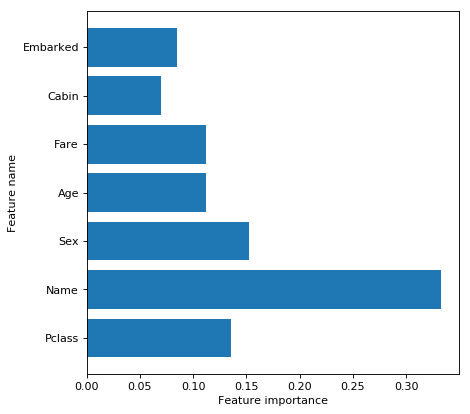

In [104]:
features = list(cf)[:11]
clf = RandomForestClassifier(n_estimators=20).fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))


plt.figure ()
plot_feature_importances(clf, features)


In [105]:
clf.fit(cf, target)
prediction = clf.predict(test_data)
print ('Score train= {}'.format(clf.score(cf,target)))

Score train= 0.8787878787878788


In [107]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)